## This program predicts if a passanger will survive on the titanic

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the dataset
titanic=sns.load_dataset('titanic')
#print first 10 rows of data
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
#count number of rows and coloumns in dataset
titanic.shape

(891, 15)

In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Get the count of number of survivors
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

## VISUALIZE THE DATA

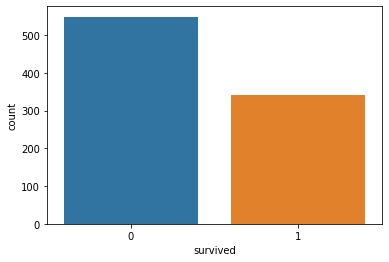

In [6]:
 #visualise the count of survivors
sns.countplot(titanic['survived'])

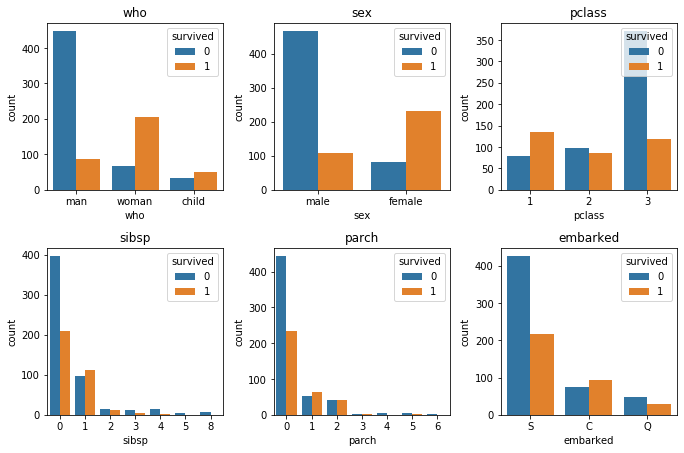

In [7]:
#Visualize the count of survivers for coloumns 'who','sex','pclass','sibsp','parch','embarked'
cols=['who','sex','pclass','sibsp','parch','embarked']

n_rows=2
n_cols=3

#The subplot grid and figure size of each graph
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_rows*3.2))
for r in range (0,n_rows):
    for c in range(0,n_cols):
        
        i= r*n_cols + c
        ax = axs[r][c]
        sns.countplot(titanic[cols[i]],hue=titanic['survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived',loc = 'upper right')
        plt.tight_layout()


In [8]:
#survival rate by sex
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [9]:
#survival rate by sex and class
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


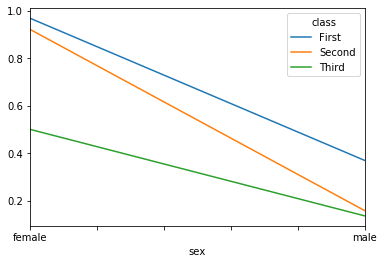

In [10]:
#survival rate by sex and class visually
titanic.pivot_table('survived',index='sex',columns='class').plot()

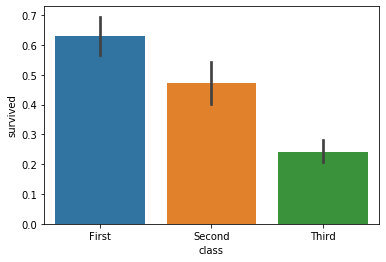

In [11]:
#Plot the survival rate of each class
sns.barplot(x='class',y='survived',data=titanic)

In [12]:
#Survival rate by sex,age and class
age=pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

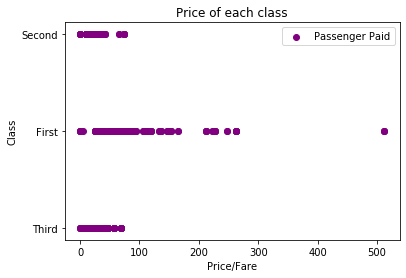

In [13]:
#Plot the prices paid of each class
plt.scatter(titanic['fare'],titanic['class'],color='purple',label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price/Fare')
plt.title('Price of each class')
plt.legend()
plt.show()

In [14]:
#Count the empty or missing values in each coloumns
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
#look at each values in each coloumn and get a count
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp,

In [16]:
#Drop the redundant coloumns
titanic=titanic.drop(['deck','embark_town','alive','class','who','alone','adult_male'],axis=1)

#Remove the rows with missing values
titanic=titanic.dropna(subset=['embarked','age'])


In [17]:
#Count nw number of rows and coloumns in the data set
titanic.shape

(712, 8)

In [18]:
#data types
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [19]:
#Print the unique values
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [20]:
#convert object data type to integer
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode the sex coloumn
titanic.iloc[:,2]=labelencoder.fit_transform(titanic.iloc[:,2].values)
#Encode the embarked coloumn
titanic.iloc[:,7]=labelencoder.fit_transform(titanic.iloc[:,7].values)

In [21]:
#Print the unique values that are now transformed into numeric values
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [22]:
titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

In [23]:
#split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:,1:8].values  
Y = titanic.iloc[:,0].values    

In [24]:
#Split the dataset into 80% train and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [25]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
#Create a function with many machine learning models
def models(X_train,Y_train):
    # Using "LOGISTIC REGRESSION"
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train,Y_train)
    
    #Using "KNN"
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(X_train,Y_train)
    
    #Using "SVC(linear kernal)"
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    #Using "SVC(RBF kernal)"
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(X_train,Y_train)
    
    #Using GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #Using DecisionTree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion= 'entropy',random_state=0)
    tree.fit(X_train,Y_train)
    
    #Using RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10,criterion= 'entropy',random_state=0)
    forest.fit(X_train,Y_train)
    
    
    #Print the training accuracy of each model
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train,Y_train))
    print('[1]KNeighborsClassifier Training Accuracy: ', knn.score(X_train,Y_train))
    print('[2]SVC(linear kernal) Training Accuracy: ', svc_lin.score(X_train,Y_train))
    print('[3]SVC(RBF kernal) Training Accuracy: ', svc_rbf.score(X_train,Y_train))
    print('[4]GaussianNB Training Accuracy: ', gauss.score(X_train,Y_train))
    print('[5]DecisionTree Training Accuracy: ', tree.score(X_train,Y_train))
    print('[6]RandomForestClassifier Training Accuracy: ', forest.score(X_train,Y_train))
    
    
    return log,knn,svc_lin,svc_rbf,gauss,tree,forest

In [27]:
#Get and train all models
model = models(X_train,Y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0]Logistic Regression Training Accuracy:  0.7978910369068541
[1]KNeighborsClassifier Training Accuracy:  0.8664323374340949
[2]SVC(linear kernal) Training Accuracy:  0.7768014059753954
[3]SVC(RBF kernal) Training Accuracy:  0.8506151142355008
[4]GaussianNB Training Accuracy:  0.8031634446397188
[5]DecisionTree Training Accuracy:  0.9929701230228472
[6]RandomForestClassifier Training Accuracy:  0.9753954305799648


In [28]:
#Confusion matrix and accuracy score for all models on test data
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm=confusion_matrix(Y_test,model[i].predict(X_test))
    
    #Extract TN,FP,FN,TP
    TN,FP,FN,TP=confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
    
    test_score=(TN+TP)/(FP+FN+TP+TN)
    print('=== {} ==='.format(i))
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i,test_score))
    print()
    

=== 0 ===
[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

=== 1 ===
[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

=== 2 ===
[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

=== 3 ===
[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

=== 4 ===
[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

=== 5 ===
[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

=== 6 ===
[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



In [29]:
#Feature importance
forest = model[6]
importances = pd.DataFrame({'feature':titanic.iloc[:,1:8].columns,'importance': np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


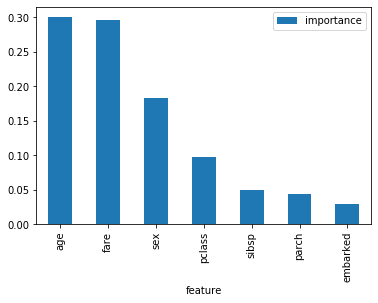

In [30]:
#Visualize the importance
importances.plot.bar()

In [31]:
#Prediction of RandomForestClassifier
pred = model[6].predict(X_test)
print(pred)

print()

#Print actual values
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


## After analyzing the data, created our models and chosen model to predict who would have survived the titanic crash, we will now test and see if I would have survived or not

In [33]:
a=input("Enter the travelling class: ")
b=input("Enter the sex: ")  #1 for male and 0 for female
c=input("Enter the age: ")  
d=input("Enter the number of siblings/spouse aboard: ")
e=input("Enter the number of parents/chilren aboard: ")
f=input("Enter the fare: ")
g=input("Enter the port of embarkation: ")   #0 for Cherbourg 1 for Queenstown 2 for Southampton
#Scaling my survival
my_survival = [[a,b,c,d,e,f,g]]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

#Print Prediction of Random Forest Classifier model
pred = model[6].predict(my_survival)
print(pred)

if pred == 0:
  print('Oh no! You did not make it')
else:
  print('Nice! You survived')

Enter the travelling class: 1
Enter the sex: 0
Enter the age: 21
Enter the number of siblings/spouse aboard: 1
Enter the number of parents/chilren aboard: 2
Enter the fare: 200
Enter the port of embarkation: 2
[0]
Oh no! You did not make it
